Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.


Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.


The data & attributes information for this project is available at -   https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/Links to an external site.

The data consists of those diagnosed with Parkinson Disease and those who do not.

In [0]:
################################################################### QUESTIONS S#######################################W#########################################

##  1. Load the dataset
##  2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file,
##      number of attributes, types of attributes and a general  idea of likely challenges in the dataset. (2.5 points)
##  3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. 
##      what are your observations? (15 points)
##  4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).
##  5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)
##  6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)
##  7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 
##  8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)


#####################################################################################################################################################################

In [0]:
## Note : - The voiced speech of a typical adult male will have a fundamental frequency from 85 to 180 Hz, and that of a typical adult female from 165 to 255 Hz.

## so in all frequency ranges from 85 Hz to 255 Hz.

In [0]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import io

In [0]:
##  1. Load the dataset
from google.colab import files  ## https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/
uploaded = files.upload()

Saving parkinsons.data to parkinsons (1).data


In [0]:
########################################################################################################################################################################

 #                                                Ensemble_Techniques_R3_Project1_Parkinson’s_Disease_Model
  
########################################################################################################################################################################
 

In [0]:
data_raw = pd.read_csv(io.BytesIO(uploaded['parkinsons.data']))


##  2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file,
##      number of attributes, types of attributes and a general  idea of likely challenges in the dataset. (2.5 points)


print(data_raw.shape)
print(data_raw.columns)
print(data_raw.info())

(195, 24)
Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null flo

In [0]:
## making a copy of our dataset

data_train = data_raw.copy(deep=True)

In [0]:
data_train.sample(10)  


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
48,phon_R01_S13_1,122.188,128.611,115.765,0.00524,0.000040,0.00169,0.00203,0.00507,0.01613,0.143,0.00855,0.00776,0.01433,0.02566,0.00839,23.162,0,0.579597,0.733659,-6.439398,0.266392,2.079922,0.133867
94,phon_R01_S22_4,157.821,172.975,68.401,0.00358,0.000020,0.00196,0.00196,0.00587,0.03716,0.307,0.02062,0.02321,0.02764,0.06185,0.00850,22.219,1,0.502380,0.712170,-6.251425,0.188056,2.143851,0.160812
33,phon_R01_S07_4,202.266,211.604,197.079,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,0.085,0.00469,0.00606,0.00719,0.01407,0.00072,32.684,0,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
43,phon_R01_S10_2,241.404,248.834,232.483,0.00281,0.000010,0.00157,0.00173,0.00470,0.01760,0.154,0.01006,0.01038,0.01251,0.03017,0.00675,23.145,0,0.457702,0.634267,-6.793547,0.158266,2.256699,0.117399
174,phon_R01_S43_4,117.004,144.466,99.923,0.00353,0.000030,0.00176,0.00218,0.00528,0.01657,0.145,0.00881,0.01062,0.01318,0.02643,0.00590,25.445,0,0.387482,0.756482,-6.012559,0.229298,1.872946,0.163118
146,phon_R01_S35_1,169.774,191.759,151.451,0.01568,0.000090,0.00863,0.00946,0.02589,0.08143,0.821,0.03804,0.05426,0.08808,0.11411,0.07530,12.359,1,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
99,phon_R01_S24_3,126.512,141.756,99.770,0.01936,0.000150,0.01159,0.00990,0.03476,0.06734,0.659,0.03611,0.03963,0.05783,0.10833,0.16744,12.435,1,0.638545,0.674953,-3.760348,0.242861,2.634633,0.378483
121,phon_R01_S27_7,176.824,215.293,83.961,0.00460,0.000030,0.00209,0.00221,0.00628,0.01169,0.117,0.00534,0.00630,0.01104,0.01603,0.01161,27.166,1,0.400088,0.656182,-4.711007,0.281618,2.655744,0.234809
168,phon_R01_S42_4,197.569,217.627,90.794,0.00803,0.000040,0.00490,0.00448,0.01470,0.02177,0.189,0.01279,0.01272,0.01439,0.03836,0.01337,19.269,0,0.372222,0.725216,-5.736781,0.164529,2.882450,0.202879
57,phon_R01_S16_4,117.274,129.916,110.402,0.00752,0.000060,0.00299,0.00469,0.00898,0.02293,0.221,0.01189,0.01459,0.01948,0.03568,0.00681,22.817,1,0.530529,0.817756,-4.608260,0.290024,2.021591,0.314464


No handles with labels found to put in legend.


healthy count :- 147  and  parkinson count :- 48 




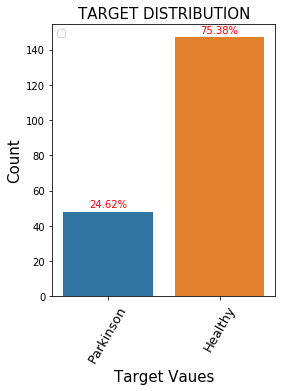

In [0]:
##################################### CHECKING THE TARGET COLUMN  DISTRIBUTION #########################################

parkinson ,healthy  = np.bincount(data_train['status'])
print('healthy count :- {}  and  parkinson count :- {} \n\n'.format(healthy , parkinson))

fig, qaxis1 = plt.subplots(1,1,figsize=(4,5))           
ax = sns.countplot(x=data_train['status'])
ax.legend()
ax.set_title("TARGET DISTRIBUTION", fontsize = 15)
ax.set_xlabel("Target Vaues", fontsize = 15)
ax.set_ylabel("Count", fontsize = 15)
ax.set(xticklabels=['Parkinson','Healthy'])
plt.xticks( fontsize =13,rotation=60)
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.40, i.get_height()+4,str(round((i.get_height()/total)*100, 2))+'%',ha = 'center', va = 'center', fontsize=10,color='red', rotation=0)
    


In [0]:
from scipy.stats import chisquare, chi2_contingency

chisquare(data_train['status'].value_counts()) #### p value is very less tha 0.05, so value counts are not in equal proportions 

Power_divergenceResult(statistic=50.261538461538464, pvalue=1.3456117688917e-12)

In [0]:
#######################  IDENTIFYING THE NULL VALUES #############################

In [0]:
data_train.isnull().sum().sort_values(ascending=False).sum()

0

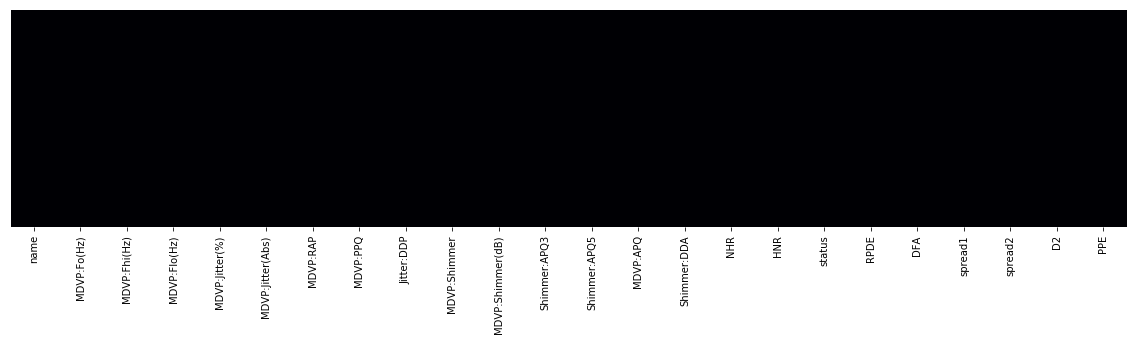

In [0]:

## finding the null and missing values in the database
plt.figure(figsize=(20,4))
sns.heatmap(data_train.isnull(),xticklabels=True,yticklabels=False,cbar=False,cmap='inferno') 

## since we don't have any null values so graph shows uniform color for all attributes

In [0]:
## MDVP:Jitter(%)  -- Kay Pentax MDVP jitter as a percentage [ MDVP stands for (Kay Pentax) Multi-Dimensional Voice Program]  -- dropped
## MDVP:Jitter(Abs)  -- Kay Pentax MDVP absolute jitter in microseconds  - dropped
## MDVP:RAP -- Kay Pentax MDVP Relative Amplitude Perturbation
## MDVP:PPQ -- Kay  Pentax MDVP  five-point  Period  Perturbation  Quotient  -- dropped
## MDVP:APQ -- Kay Pentax MDVP 11-point Amplitude  Perturbation Quotient -- dropped
## MDVP:Shimmer -- Kay Pentax MDVP local shimmer  [shimmer (the extent of variation in speech amplitude from cycle to cycle)]
## MDVP:Shimmer(dB) -- Kay Pentax MDVP local shimmer in decibels - dropped
## MDVP:Fo(Hz)
## MDVP:Fhi(Hz)
## MDVP:Flo(Hz)
## Shimmer:APQ3 -- Three point Amplitude Perturbation Quotient - dropped
## Shimmer:APQ5 -- Five point Amplitude Perturbation Quotient  - dropped
## Shimmer:DDA -- Average absolute difference between consecutive differences between the amplitudes of consecutive periods -- dropped
## NHR --- Noise-to-Harmonics Ratio , the amplitude of noise relative to tonal components in the speech -- dropped
## HNR --- Harmonics-to-Noise Ratio ,Noise  Sources  - Uncontrolled  variation in  the  acoustic  environment of  the clinic and  home ,
##         physical condition and  characteristics  of  the subject.
## spread1 -- dropped
## spread2
## Jitter:DDP -- Average  absolute  difference  of  differences  between  cycles, divided by the average period,the extent of variation in speech F0 from 
##       vocal cycle to vocal  cycle -- dropped
## RPDE  -- Recurrence Period Density Entropy
## DFA  -- Detrended Fluctuation Analysis ,The DFA algorithm calculates the extent of amplitude variation F(L) of the speech generated by turbulent airflow 
##        through the vocal folds /
##         signal over a range of time scales L, and the self-similarity of the speech signal is
## D2 -- Correlation dimension is calculated by first time-delay embedding the signal to recreate the phase space of the nonlinear dynamical system that is proposed to /
##       generate the speech signal.
## PPE -- Pitch period entropy,which is robust to many uncontrollable confounding effects including noisy acoustic environments and normal healthy variations 
##       in voice frequency


## Dysphonia - causes involuntary spasms in the muscles of the voice box or larynx. This causes the voice to break, and have a tight, strained, or strangled sound.
## Speech sounds produced during  standard speech  tests are  recorded  using a microphone,  and the  recorded  speech signals are  subsequently  analyzed
## Using measurement methods (implemented in software algorithms) designed to detect certain properties of these signals
##  there are many features that are merely duplicate of the other features or have a high correlation with the other features. Such features are basically redundant and can be ignored.

In [0]:
############################################  FEATURE ANALYSIS ################################################################################

In [0]:
##  3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. 
##      what are your observations? (15 points)

In [0]:
##correlation used - spearman , pearson,kendall


correlation between Shimmer:APQ5 and Shimmer:DDA is cor_s := 0.9782613973105113 , cor_p := 0.9600715928435881 , cor_k := 0.8778359511343803 




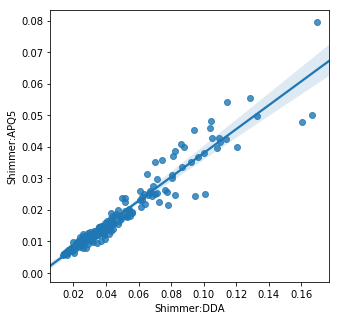

In [0]:
## CHECKING FOR HIGHLY DEPENDENT ATTRIBUTES / FEATURES ==>  Shimmer:DDA V/S Shimmer:APQ5

#Correlation with output variable

col1 = 'Shimmer:APQ5'
col2 = 'Shimmer:DDA'

cor_s = data_train[col1].corr(data_train[col2],method='spearman')
cor_k = data_train[col1].corr(data_train[col2],method='kendall')
cor_p = data_train[col1].corr(data_train[col2],method='pearson')
print('\ncorrelation between {} and {} is cor_s := {} , cor_p := {} , cor_k := {} \n\n'.format(col1,col2,cor_s,cor_p,cor_k))

plt.subplots(figsize=(5,5))

sns.regplot(y=data_train[col1], x=data_train[col2], data=data_train)
      
plt.show()


# will  drop Shimmer:DDA column


correlation between Shimmer:APQ5 and Shimmer:APQ3 is cor_s := 0.9782702546566852 , cor_p := 0.9600697638028982 , cor_k := 0.8780049266190391 




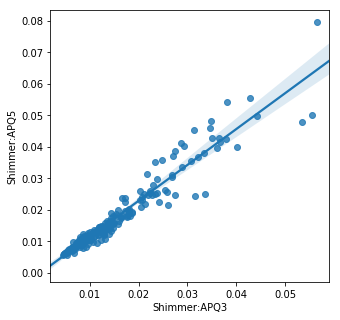

In [0]:

## CHECKING FOR HIGHLY DEPENDENT ATTRIBUTES / FEATURES ==>  Shimmer:APQ3 V/S Shimmer:APQ5

#Correlation with output variable

col1 = 'Shimmer:APQ5'
col2 = 'Shimmer:APQ3'

cor_s = data_train[col1].corr(data_train[col2],method='spearman')
cor_k = data_train[col1].corr(data_train[col2],method='kendall')
cor_p = data_train[col1].corr(data_train[col2],method='pearson')
print('\ncorrelation between {} and {} is cor_s := {} , cor_p := {} , cor_k := {} \n\n'.format(col1,col2,cor_s,cor_p,cor_k))

plt.subplots(figsize=(5,5))

sns.regplot(y=data_train[col1], x=data_train[col2], data=data_train)
      
plt.show()


# will  drop Shimmer:APQ3 column


correlation between MDVP:Shimmer and MDVP:Shimmer(dB) is cor_s := 0.9931854381114948 , cor_p := 0.9872578145507641 , cor_k := 0.940364289701615 




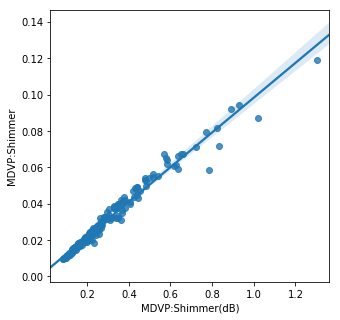

In [0]:
## CHECKING FOR HIGHLY DEPENDENT ATTRIBUTES / FEATURES ==>  MDVP:Shimmer  V/S MDVP:Shimmer(dB)

#Correlation with output variable

col1 = 'MDVP:Shimmer'
col2 = 'MDVP:Shimmer(dB)'

cor_s = data_train[col1].corr(data_train[col2],method='spearman')
cor_k = data_train[col1].corr(data_train[col2],method='kendall')
cor_p = data_train[col1].corr(data_train[col2],method='pearson')
print('\ncorrelation between {} and {} is cor_s := {} , cor_p := {} , cor_k := {} \n\n'.format(col1,col2,cor_s,cor_p,cor_k))

plt.subplots(figsize=(5,5))

sns.regplot(y=data_train[col1], x=data_train[col2], data=data_train)
      
plt.show()


# will drop 'MDVP:Shimmer(dB)' column


correlation between MDVP:RAP and MDVP:PPQ is cor_s := 0.9664330792329809 , cor_p := 0.957316893048001 , cor_k := 0.8466736222257796 




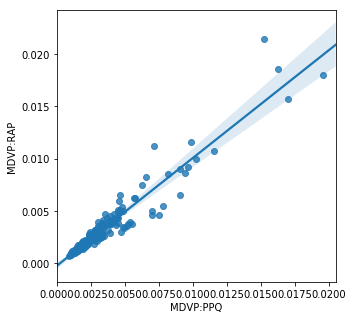

In [0]:
## CHECKING FOR HIGHLY DEPENDENT ATTRIBUTES / FEATURES ==>  MDVP:RAP  V/S  MDVP:PPQ

#Correlation with output variable

col1 = 'MDVP:RAP'
col2 = 'MDVP:PPQ'

cor_s = data_train[col1].corr(data_train[col2],method='spearman')
cor_k = data_train[col1].corr(data_train[col2],method='kendall')
cor_p = data_train[col1].corr(data_train[col2],method='pearson')
print('\ncorrelation between {} and {} is cor_s := {} , cor_p := {} , cor_k := {} \n\n'.format(col1,col2,cor_s,cor_p,cor_k))

plt.subplots(figsize=(5,5))

sns.regplot(y=data_train[col1], x=data_train[col2], data=data_train)
      
plt.show()

# will drop MDVP:PPQ column


correlation between MDVP:Jitter(%) and MDVP:Jitter(Abs) is cor_s := 0.9193956439177015 , cor_p := 0.9357139812023573 , cor_k := 0.7952705099425347 




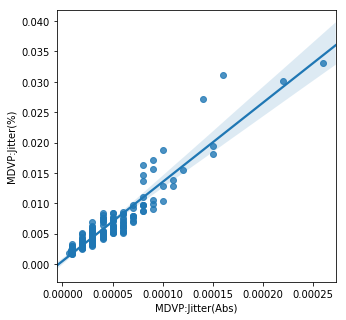

In [0]:

## CHECKING FOR HIGHLY DEPENDENT ATTRIBUTES / FEATURES ==>  data_train['MDVP:Jitter(%)']  V/S  data_train['MDVP:Jitter(Abs)']


col1 = 'MDVP:Jitter(%)'
col2 = 'MDVP:Jitter(Abs)'

cor_s = data_train[col1].corr(data_train[col2],method='spearman')
cor_k = data_train[col1].corr(data_train[col2],method='kendall')
cor_p = data_train[col1].corr(data_train[col2],method='pearson')
print('\ncorrelation between {} and {} is cor_s := {} , cor_p := {} , cor_k := {} \n\n'.format(col1,col2,cor_s,cor_p,cor_k))

plt.subplots(figsize=(5,5))

sns.regplot(y=data_train[col1], x=data_train[col2], data=data_train)
      
plt.show()

# will drop MDVP:Jitter(Abs) column


correlation between spread1 and PPE is cor_s := 0.9787599734580588 , cor_p := 0.9624352932572794 , cor_k := 0.909278350515464 




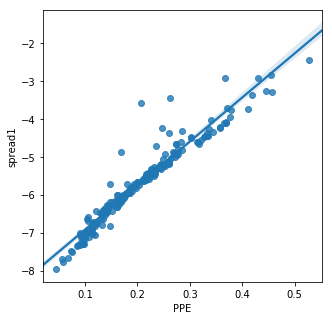

In [0]:
## CHECKING FOR HIGHLY DEPENDENT ATTRIBUTES / FEATURES ==>  spread1  V/S  PPE

#Correlation with output variable

col1 = 'spread1'
col2 = 'PPE'

cor_s = data_train[col1].corr(data_train[col2],method='spearman')
cor_k = data_train[col1].corr(data_train[col2],method='kendall')
cor_p = data_train[col1].corr(data_train[col2],method='pearson')
print('\ncorrelation between {} and {} is cor_s := {} , cor_p := {} , cor_k := {} \n\n'.format(col1,col2,cor_s,cor_p,cor_k))

plt.subplots(figsize=(5,5))

sns.regplot(y=data_train[col1], x=data_train[col2], data=data_train)
      
plt.show()


# will drop 'spread1' column


correlation between NHR and MDVP:RAP is cor_s := 0.8006934297401841 , cor_p := 0.9195207096034024 , cor_k := 0.6046231950834607 




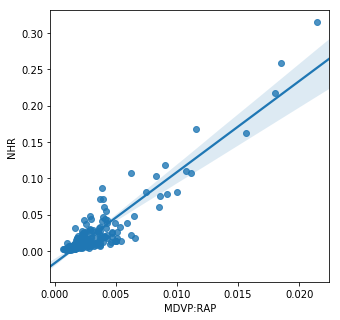

In [0]:
## CHECKING FOR HIGHLY DEPENDENT ATTRIBUTES / FEATURES ==>  NHR  V/S  MDVP:RAP

#Correlation with output variable

col1 = 'NHR'
col2 = 'MDVP:RAP'

cor_s = data_train[col1].corr(data_train[col2],method='spearman')
cor_k = data_train[col1].corr(data_train[col2],method='kendall')
cor_p = data_train[col1].corr(data_train[col2],method='pearson')
print('\ncorrelation between {} and {} is cor_s := {} , cor_p := {} , cor_k := {} \n\n'.format(col1,col2,cor_s,cor_p,cor_k))

plt.subplots(figsize=(5,5))

sns.regplot(y=data_train[col1], x=data_train[col2], data=data_train)
      
plt.show()


# will drop 'NHR' column


correlation between Jitter:DDP and MDVP:RAP is cor_s := 0.9999801739954417 , cor_p := 0.9999996001041339 , cor_k := 0.9990735959684771 




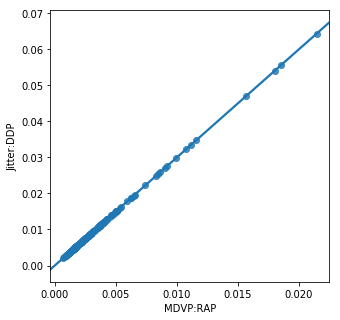

In [0]:
## CHECKING FOR HIGHLY DEPENDENT ATTRIBUTES / FEATURES ==>  Jitter:DDP  V/S  MDVP:RAP

#Correlation with output variable

col1 = 'Jitter:DDP'
col2 = 'MDVP:RAP'

cor_s = data_train[col1].corr(data_train[col2],method='spearman')
cor_k = data_train[col1].corr(data_train[col2],method='kendall')
cor_p = data_train[col1].corr(data_train[col2],method='pearson')
print('\ncorrelation between {} and {} is cor_s := {} , cor_p := {} , cor_k := {} \n\n'.format(col1,col2,cor_s,cor_p,cor_k))

plt.subplots(figsize=(5,5))

sns.regplot(y=data_train[col1], x=data_train[col2], data=data_train)
      
plt.show()

# will drop Jitter:DDP column


correlation between MDVP:Jitter(%) and MDVP:RAP is cor_s := 0.9619586109139358 , cor_p := 0.9902755852458308 , cor_k := 0.8532078094641397 




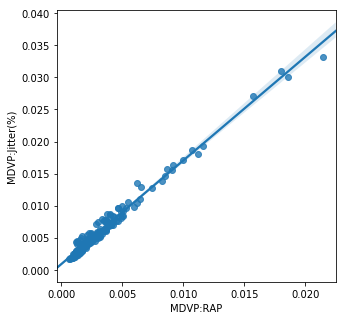

In [0]:
## CHECKING FOR HIGHLY DEPENDENT ATTRIBUTES / FEATURES ==>  MDV RAP vs MDVP jitter(%)

#Correlation with output variable

col1 = 'MDVP:Jitter(%)'
col2 = 'MDVP:RAP'

cor_s = data_train[col1].corr(data_train[col2],method='spearman')
cor_k = data_train[col1].corr(data_train[col2],method='kendall')
cor_p = data_train[col1].corr(data_train[col2],method='pearson')
print('\ncorrelation between {} and {} is cor_s := {} , cor_p := {} , cor_k := {} \n\n'.format(col1,col2,cor_s,cor_p,cor_k))

plt.subplots(figsize=(5,5))

sns.regplot(y=data_train[col1], x=data_train[col2], data=data_train)
      
plt.show()

# will drop ''MDVP:Jitter(%)'' column


correlation between MDVP:Shimmer and Shimmer:APQ5 is cor_s := 0.9870247258094624 , cor_p := 0.9828354477070597 , cor_k := 0.910278446519695 




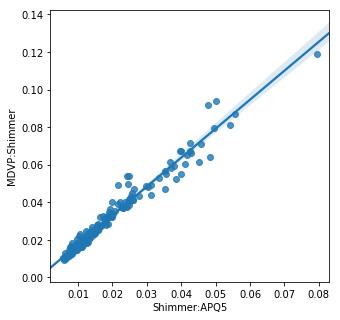

In [0]:
## CHECKING FOR HIGHLY DEPENDENT ATTRIBUTES / FEATURES ==> MDVP SHIMMER vs Shimmer:APQ5

#Correlation with output variable

col1 = 'MDVP:Shimmer'
col2 = 'Shimmer:APQ5'

cor_s = data_train[col1].corr(data_train[col2],method='spearman')
cor_k = data_train[col1].corr(data_train[col2],method='kendall')
cor_p = data_train[col1].corr(data_train[col2],method='pearson')
print('\ncorrelation between {} and {} is cor_s := {} , cor_p := {} , cor_k := {} \n\n'.format(col1,col2,cor_s,cor_p,cor_k))

plt.subplots(figsize=(5,5))

sns.regplot(y=data_train[col1], x=data_train[col2], data=data_train)
      
plt.show()


# will drop Shimmer:APQ5 column


correlation between MDVP:Shimmer and MDVP:APQ is cor_s := 0.9723290716301153 , cor_p := 0.9500828933606194 , cor_k := 0.8625750326944124 




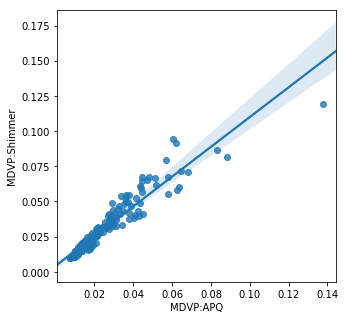

In [0]:
## CHECKING FOR HIGHLY DEPENDENT ATTRIBUTES / FEATURES ==> MDVP SHIMMER vs MDVP:APQ	

#Correlation with output variable

col1 = 'MDVP:Shimmer'
col2 = 'MDVP:APQ'

cor_s = data_train[col1].corr(data_train[col2],method='spearman')
cor_k = data_train[col1].corr(data_train[col2],method='kendall')
cor_p = data_train[col1].corr(data_train[col2],method='pearson')
print('\ncorrelation between {} and {} is cor_s := {} , cor_p := {} , cor_k := {} \n\n'.format(col1,col2,cor_s,cor_p,cor_k))

plt.subplots(figsize=(5,5))

sns.regplot(y=data_train[col1], x=data_train[col2], data=data_train)
      



# will drop MDVP:APQ	column


correlation between MDVP:Shimmer and HNR is cor_s := -0.8664511746293075 , cor_p := -0.8352706760187866 , cor_k := -0.6751447647549834 




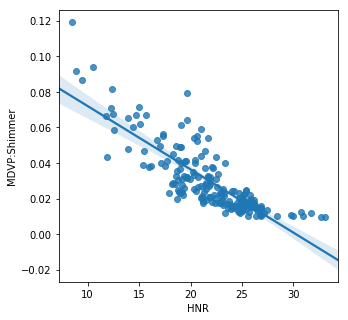

In [0]:
## CHECKING FOR HIGHLY DEPENDENT ATTRIBUTES / FEATURES ==> MDVP SHIMMER vs HNR	

#Correlation with output variable

col1 = 'MDVP:Shimmer'
col2 = 'HNR'

cor_s = data_train[col1].corr(data_train[col2],method='spearman')
cor_k = data_train[col1].corr(data_train[col2],method='kendall')
cor_p = data_train[col1].corr(data_train[col2],method='pearson')
print('\ncorrelation between {} and {} is cor_s := {} , cor_p := {} , cor_k := {} \n\n'.format(col1,col2,cor_s,cor_p,cor_k))

plt.subplots(figsize=(5,5))

sns.regplot(y=data_train[col1], x=data_train[col2], data=data_train)
      



# will drop MDVP:APQ	column

In [0]:
## Based on above analysis wil drop columns ==> criteria - pearson correlation >= 0.8

data_train.drop(columns=[ 'Jitter:DDP','NHR','spread1','MDVP:Jitter(Abs)','MDVP:PPQ' ,'MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:DDA','MDVP:Jitter(%)','Shimmer:APQ5','MDVP:APQ','HNR','MDVP:Fhi(Hz)','MDVP:RAP','MDVP:Shimmer'],axis=1,inplace=True)

data_train.sample(4)

,name,MDVP:Fo(Hz),MDVP:Flo(Hz),status,RPDE,DFA,spread2,D2,PPE
17,phon_R01_S04_6,168.778,75.603,1,0.631099,0.605417,0.434326,3.007463,0.430788
180,phon_R01_S44_4,150.440,144.736,1,0.352396,0.759320,0.183218,2.264226,0.144105
127,phon_R01_S31_6,166.888,79.512,1,0.585169,0.736964,0.115697,1.996146,0.196535
7,phon_R01_S02_2,107.332,104.315,1,0.637420,0.763262,0.183721,2.064693,0.163755


In [0]:

#################### 3- Correlation Matrix with Heatmap ####################################

#correlation heatmap of dataset
def correlation_heatmap(df):
    fig , ax = plt.subplots(figsize =(15,10))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(df.corr(),cmap = colormap,square=True,cbar_kws={'shrink':.5 }, ax=ax,annot=True,linewidths=0.1,vmax=0.3, linecolor='white',annot_kws={'fontsize':12 } )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

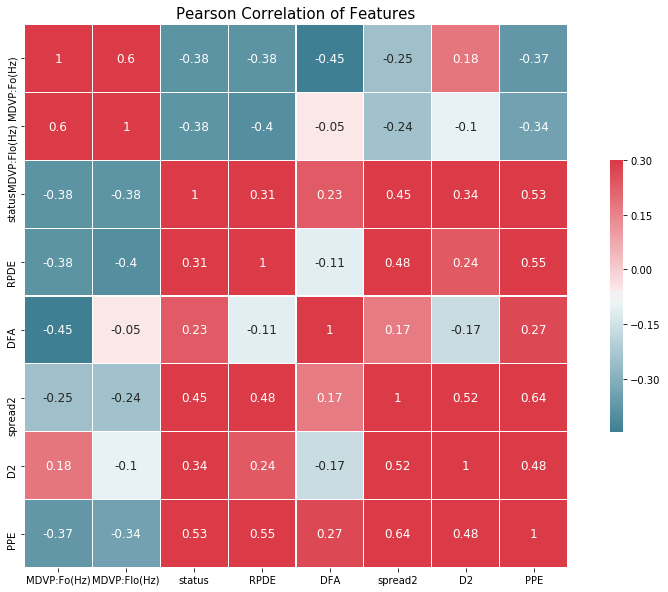

In [0]:
correlation_heatmap(data_train)

In [0]:
##################  CHECKING THE DISTRIBUTION OF CONTONOUS COLUMNS ###################################


In [0]:

data_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
status,195.0,0.753846,0.431878,0.000000,1.000000,1.000000,1.000000,1.000000
RPDE,195.0,0.498536,0.103942,0.256570,0.421306,0.495954,0.587562,0.685151
DFA,195.0,0.718099,0.055336,0.574282,0.674758,0.722254,0.761881,0.825288
spread2,195.0,0.226510,0.083406,0.006274,0.174351,0.218885,0.279234,0.450493
D2,195.0,2.381826,0.382799,1.423287,2.099125,2.361532,2.636456,3.671155
PPE,195.0,0.206552,0.090119,0.044539,0.137451,0.194052,0.252980,0.527367


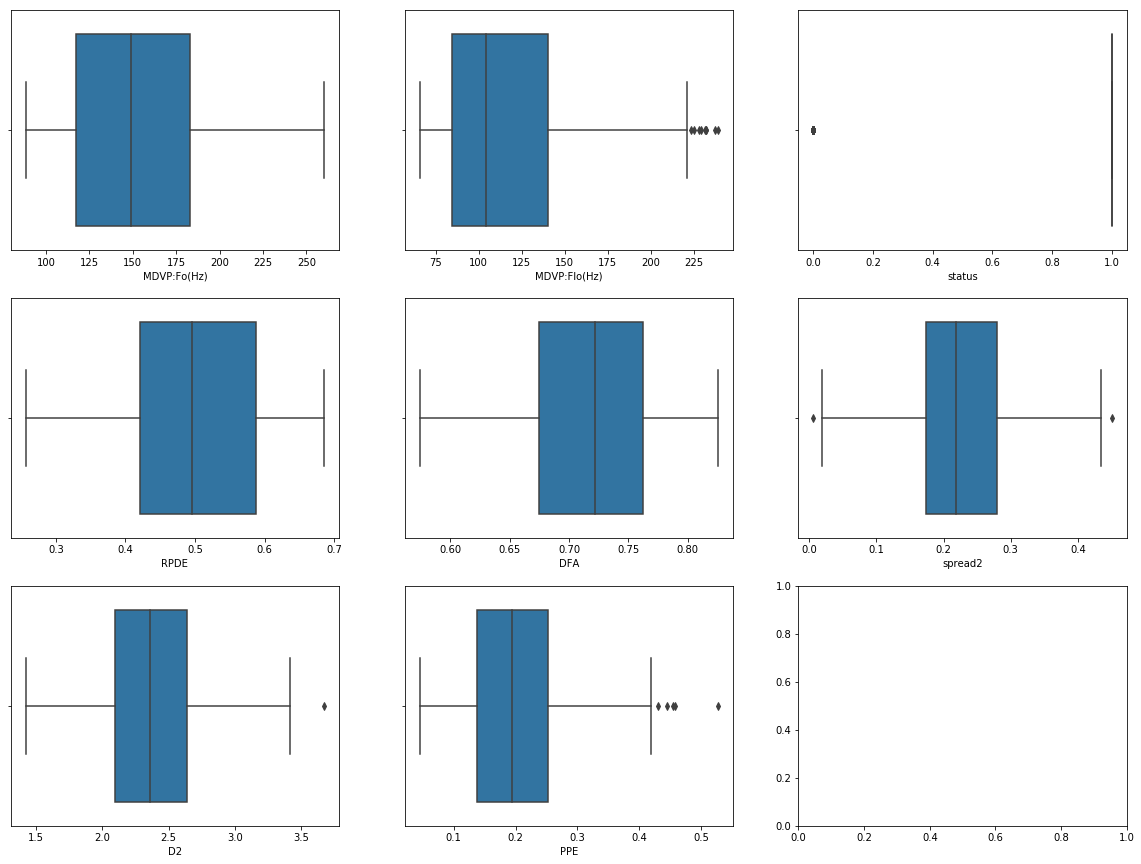

In [0]:
col_d = data_train.select_dtypes(exclude=['object']).columns
row = int(np.ceil(len(data_train.select_dtypes(exclude=['object']).columns)/3))
fig, qaxis = plt.subplots(row,3,figsize=(20,15))

i=0
j=0
k=0
for i in range (len(col_d)):  
  ax= sns.boxplot(x=data_train[col_d[i]],ax = qaxis[j,k]) 
  
  k=k+1
  j=j
  if k==3:
    j=j+1
    k=0   
   

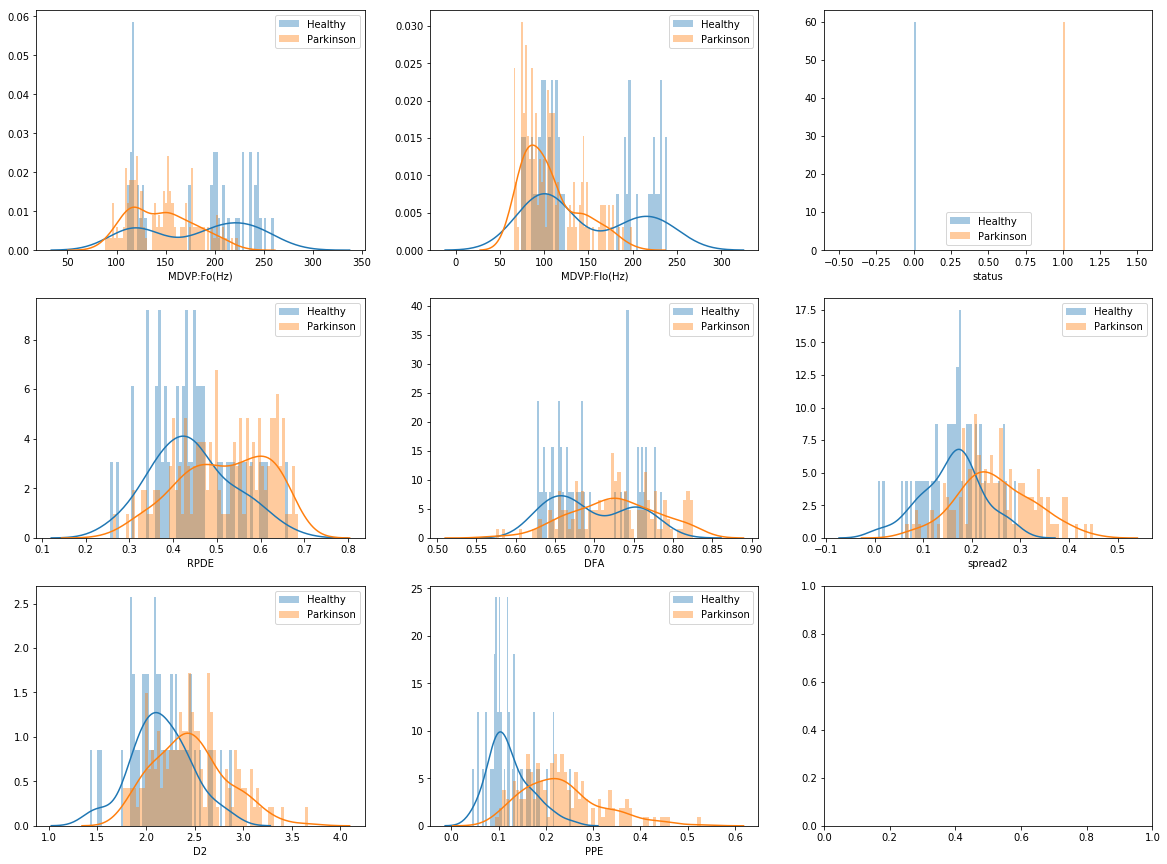

In [0]:


## status - Health status of the subject (one) - Parkinson's, (zero) - healthy
row = int(np.ceil(len(data_train.select_dtypes(exclude=['object']).columns)/3))
fig, qaxis = plt.subplots(row,3,figsize=(20,15))
col_d = data_train.select_dtypes(exclude=['object']).columns
i=0
j=0
k=0
for i in range (len(col_d)):
  
  ax= sns.distplot(data_train[(data_train['status']==0)==True][col_d[i]],bins=60,ax = qaxis[j,k],label = ['Healthy'])
  ax= sns.distplot(data_train[(data_train['status']==1)==True][col_d[i]],bins=60,ax = qaxis[j,k],label = ['Parkinson'])
  ax.legend()
  #ax.set_title("{} DISTRIBUTION".format(col_d[i]), fontsize = 8)
  k=k+1
  j=j
  if k==3:
    j=j+1
    k=0   
   

In [0]:
#####################################################  OUTLIERS DETECTION #################################################################################

out_compare = pd.DataFrame(columns=['Column_name'])

col=data_train.select_dtypes(exclude='object').columns

for i in range(len(col)):
  factor=2
  upper_lmt=data_train[col[i]].mean()+data_train[col[i]].std()*factor
  lower_lmt=data_train[col[i]].mean()-data_train[col[i]].std()*factor
  out_compare.loc[i,'Column_name']=col[i]
  out_compare.loc[i,'upper_lmt']=upper_lmt
  out_compare.loc[i,'lower_lmt']=lower_lmt
  out_compare.loc[i,'upper_outlier(%)']='{0:=5.2f} %'.format((data_train[(data_train[col[i]]>upper_lmt)==True][col[i]].count()/data_train[col[i]].count())*100)
  out_compare.loc[i,'lower_outlier(%)']='{0:<5.2f} %'.format((data_train[(data_train[col[i]]<lower_lmt)==True][col[i]].count()/data_train[col[i]].count())*100)


out_compare = out_compare.sort_values(by=['upper_outlier(%)','lower_outlier(%)'],ascending=False)
out_compare.set_index('Column_name',inplace=True)
out_compare

#Capping the outlier rows with Percentiles
#upper_lim = data['column'].quantile(.95)
#lower_lim = data['column'].quantile(.05)

,upper_lmt,lower_lmt,upper_outlier(%),lower_outlier(%)
Column_name,,,,
MDVP:Flo(Hz),203.367457,29.281804,6.15 %,0.00 %
MDVP:Fo(Hz),237.008771,71.448512,5.13 %,0.00 %
PPE,0.386790,0.026313,3.59 %,0.00 %
spread2,0.393322,0.059699,2.56 %,1.54 %
D2,3.147424,1.616228,2.56 %,1.54 %
RPDE,0.706419,0.290652,0.00 %,1.54 %
DFA,0.828771,0.607427,0.00 %,1.54 %
status,1.617602,-0.109910,0.00 %,0.00 %


In [0]:
########################################### OUTLIERS TREATMENT and Verifying it after the treatment  #################################

col=data_train.select_dtypes(exclude='object').columns
out_fx_compare = pd.DataFrame(columns=['Column_name'])

for i in range(len(col)):
  #repl_value = out_compare.loc[col[i],'upper_lmt']
  repl_value = data_train[col[i]].mean()
  #print('column {}:- has mean value {}'.format(col[i],repl_value))
  data_train[col[i]].replace(data_train[(data_train[col[i]]>out_compare.loc[col[i],'upper_lmt'])==True][col[i]],repl_value,inplace=True)  ## value replacement
  #data_train[col[i]].replace(data_train[(data_train[col[i]]<out_compare.loc[col[i],'lower_lmt'])==True][col[i]],repl_value,inplace=True)  ## value replacement
  
  out_fx_compare.loc[i,'Column_name']=col[i]
  out_fx_compare.loc[i,'upper_lmt_old']=out_compare.loc[col[i],'upper_lmt']
  out_fx_compare.loc[i,'lower_lmt_old']=out_compare.loc[col[i],'lower_lmt']
  out_fx_compare.loc[i,'upper_outlier_nw(%)']='{0:=5.2f} %'.format((data_train[(data_train[col[i]]>out_compare.loc[col[i],'upper_lmt'])==True][col[i]].count()/data_train[col[i]].count())*100)
  out_fx_compare.loc[i,'lower_outlier_nw(%)']='{0:<5.2f} %'.format((data_train[(data_train[col[i]]<out_compare.loc[col[i],'lower_lmt'])==True][col[i]].count()/data_train[col[i]].count())*100)
 
out_fx_compare = out_fx_compare.sort_values(by=['upper_lmt_old'],ascending=False)
out_fx_compare.set_index('Column_name',inplace=True)
out_fx_compare


,upper_lmt_old,lower_lmt_old,upper_outlier_nw(%),lower_outlier_nw(%)
Column_name,,,,
MDVP:Fo(Hz),237.008771,71.448512,0.00 %,0.00 %
MDVP:Flo(Hz),203.367457,29.281804,0.00 %,0.00 %
D2,3.147424,1.616228,0.00 %,1.54 %
status,1.617602,-0.109910,0.00 %,0.00 %
DFA,0.828771,0.607427,0.00 %,1.54 %
RPDE,0.706419,0.290652,0.00 %,1.54 %
spread2,0.393322,0.059699,0.00 %,1.54 %
PPE,0.386790,0.026313,0.00 %,0.00 %


In [0]:
############################ HYPOTHESIS TESTING AFTER OUTLIERS FIXING ####################################################################

# H0 = mu1 = mu2 =mu3 where mu is mean of each sample
# H1 = mu1<>mu2=mu= mu4 where any mean among all means  is different 

# H1 < 0.05 < H0

from scipy.stats import ttest_ind,ttest_1samp,wilcoxon,mannwhitneyu,shapiro,levene
from statsmodels.stats.power import ttest_power

col=data_train.select_dtypes(exclude='object').columns

for i in range(len(col)):
  print('{} has ttest_1samp value as :- {}'.format(col[i],ttest_1samp(data_raw[col[i]],data_train[col[i]].mean())))
  


MDVP:Fo(Hz) has ttest_1samp value as :- Ttest_1sampResult(statistic=1.5628868474437743, pvalue=0.11970897624209738)
MDVP:Flo(Hz) has ttest_1samp value as :- Ttest_1sampResult(statistic=2.1881032322412253, pvalue=0.02985675819685813)
status has ttest_1samp value as :- Ttest_1sampResult(statistic=0.0, pvalue=1.0)
RPDE has ttest_1samp value as :- Ttest_1sampResult(statistic=-1.4915494657404974e-14, pvalue=0.9999999999999881)
DFA has ttest_1samp value as :- Ttest_1sampResult(statistic=-8.405089823833297e-14, pvalue=0.9999999999999329)
spread2 has ttest_1samp value as :- Ttest_1sampResult(statistic=0.8255532179945815, pvalue=0.41007161443494355)
D2 has ttest_1samp value as :- Ttest_1sampResult(statistic=0.9264154196696048, pvalue=0.3553811752842001)
PPE has ttest_1samp value as :- Ttest_1sampResult(statistic=1.3495215638006104, pvalue=0.17874222502722528)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


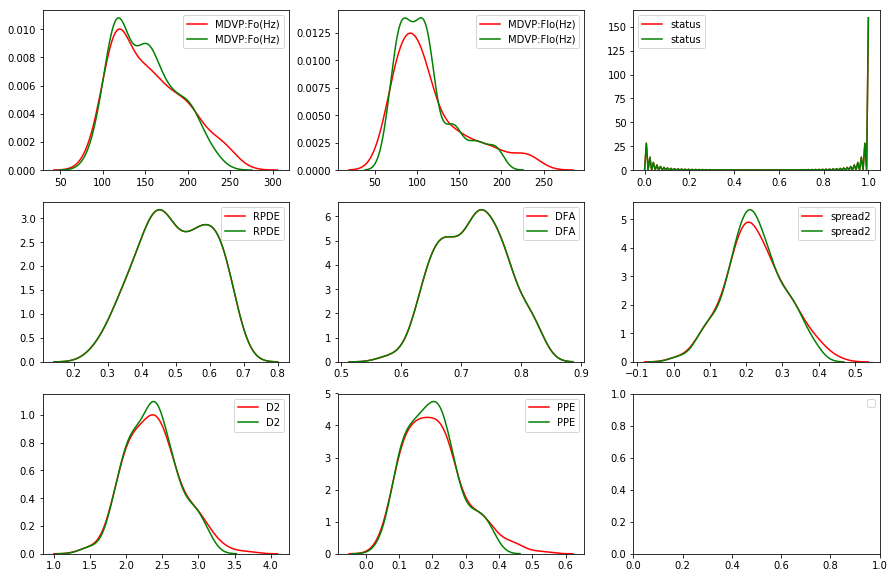

In [0]:
##################### Verifying the  distribution ###############################

## status - Health status of the subject (one) - Parkinson's, (zero) - healthy
row = int(np.ceil(len(data_train.select_dtypes(exclude=['object']).columns)/3))
fig, qaxis = plt.subplots(row,3,figsize=(15,10))
col_d = data_train.select_dtypes(exclude=['object']).columns
i=0
j=0
k=0
for i in range (len(col_d)):
  
  ax=sns.kdeplot(data_raw[col_d[i]],color='red',ax = qaxis[j,k])
  ax=sns.kdeplot(data_train[col_d[i]],color='green',ax = qaxis[j,k])
  ax.set_xlabel
  plt.legend()
  #ax.set_title("{} DISTRIBUTION".format(col_d[i]), fontsize = 8)
  k=k+1
  j=j
  if k==3:
    j=j+1
    k=0   
   

In [0]:
from sklearn.model_selection import train_test_split

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics


import io
from datetime import datetime
import time

In [0]:
X = np.array(data_train.drop(columns=['status','name'],axis=1))  #independent columns
y = np.array(data_train['status'])    #target column i.e price range

In [0]:
##  4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [0]:
train1_x, test1_x, train1_y, test1_y = train_test_split(X, y, test_size=0.3,random_state = 0)  ##  ,shuffle = True, stratify = y

In [0]:

############################### FEATURE SCALING ###########################

from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from scipy.stats import zscore

#train1_x = zscore(train1_x)
#test1_x = zscore(test1_x)

scaler = RobustScaler()

train1_x = scaler.fit_transform(train1_x)
test1_x = scaler.transform(test1_x)

In [0]:
####################################################################################################################################################

                                                # M O D E L - 1 # WITHOUT REGULARIZING THE PARAMETERS
  
####################################################################################################################################################

In [0]:
##  5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)
##  6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [0]:
  #Machine Learning Algorithm (MLA) Selection and Initialization
  
  MLA1 =  [                                
          ensemble.ExtraTreesClassifier(criterion='entropy'),                               
                               
          ensemble.RandomForestClassifier(criterion='entropy'), 

          #Trees                                                         
          tree.DecisionTreeClassifier(criterion='entropy')                                 
                                      
          
         ]

In [0]:
MLA_columns = ['MLA_Name']
MLA_compare1 = pd.DataFrame(columns = MLA_columns)

In [0]:
MLA_predict1 = pd.DataFrame({"Actual_Data_Target":test1_y})  
MLA_predict1.head(2)

,Actual_Data_Target
0,1
1,1


In [0]:
row_index1 = 0
for alg in MLA1:
    
    from datetime import datetime
    import time

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare1.loc[row_index1, 'MLA_Name'] = MLA_name
    #MLA_compare.loc[row_index1, 'MLA_Parameters'] = str(alg.get_params())   
 
    d = alg.fit(train1_x, train1_y)
    MLA_predict1[MLA_name] = alg.predict(test1_x)
    #MLA_compare.loc[row_index1, 'MLA_Intercept'] =  alg.intercept_
    MLA_compare1.loc[row_index1, 'Actual_Y_Shape'] =test1_y.shape
    MLA_compare1.loc[row_index1, 'confusion_matrix'] = str(metrics.confusion_matrix(test1_y,alg.predict(test1_x)))
    MLA_compare1.loc[row_index1, 'accuracy_score'] = metrics.accuracy_score(test1_y,alg.predict(test1_x))
    confusion_matrix = metrics.confusion_matrix(test1_y,alg.predict(test1_x))
    MLA_compare1.loc[row_index1, 'True_Positive_Rate\n[Sensitivity/Recall]'] = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
    MLA_compare1.loc[row_index1, 'Precision'] = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
    MLA_compare1.loc[row_index1, 'True_Negatve_Rate\n[Specificity]'] = confusion_matrix[1][1]/(confusion_matrix[1][0]+confusion_matrix[1][1])    
    MLA_compare1.loc[row_index1, 'mean_absolute_error'] = metrics.mean_absolute_error(test1_y, alg.predict(test1_x))
    MLA_compare1.loc[row_index1, 'mean_squared_error'] = metrics.mean_squared_error(test1_y, alg.predict(test1_x))
    MLA_compare1.loc[row_index1, 'root_mean_squared_error'] = np.sqrt(metrics.mean_squared_error(test1_y, alg.predict(test1_x)))
    #MLA_compare.loc[row_index1, 'explained_variance_score'] = explained_variance_score(test1_y, alg.predict(test1_x))
    MLA_compare1.loc[row_index1, 'Timestamp'] = str(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    if MLA_name in ['DecisionTreeRegressor']:
      import graphviz
      feature_nm = list(data_train.columns)
      class_nm = ['Healthy', 'Parkinson']
      dot_data = tree.export_graphviz(d, out_file=None,feature_names=feature_nm,class_names=class_nm,filled=True, rounded=True,special_characters=True) 
      graph_tree_regressor = graphviz.Source(dot_data)
   
    row_index1+=1

In [0]:

fmt = '%Y-%m-%d %H:%M:%S'
max_tstmp = datetime.strptime(MLA_compare1['Timestamp'].max(), fmt)
min_tstmp = datetime.strptime(MLA_compare1['Timestamp'].min(), fmt)


td = max_tstmp - min_tstmp
td_mins = int(round(td.total_seconds() / 60))

print('The model performance is approx. %s minutes' % td_mins)

The model performance is approx. 0 minutes


In [0]:
MLA_compare1.sort_values(by = ['accuracy_score','Precision'], ascending = False, inplace = True)
MLA_compare1.nlargest(5,'accuracy_score')

,MLA_Name,Actual_Y_Shape,confusion_matrix,accuracy_score,True_Positive_Rate [Sensitivity/Recall],Precision,True_Negatve_Rate [Specificity],mean_absolute_error,mean_squared_error,root_mean_squared_error,Timestamp
0,ExtraTreesClassifier,59.0,[[13 0]\n [ 1 45]],0.983051,0.978261,1.000000,0.978261,0.016949,0.016949,0.130189,2019-09-22 06:09:53
1,RandomForestClassifier,59.0,[[11 2]\n [ 3 43]],0.915254,0.934783,0.955556,0.934783,0.084746,0.084746,0.291111,2019-09-22 06:09:53
2,DecisionTreeClassifier,59.0,[[12 1]\n [ 5 41]],0.898305,0.891304,0.976190,0.891304,0.101695,0.101695,0.318896,2019-09-22 06:09:53


In [0]:
#######################################################################################################################################

#                                P E R F O R M A N C E      V I S U A L I Z A T I O N           

#######################################################################################################################################

Text(0, 0.5, 'Algorithm')

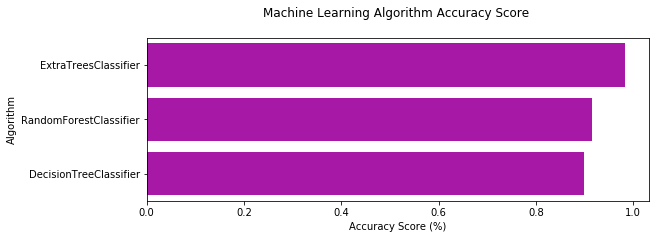

In [0]:
plt.figure(figsize=(9,3))
MLA_compare1.sort_values(by = ['accuracy_score','Precision'], ascending = False, inplace = True)
sns.barplot(x='accuracy_score', y ='MLA_Name', data = MLA_compare1 , color = 'm')
#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

No handles with labels found to put in legend.


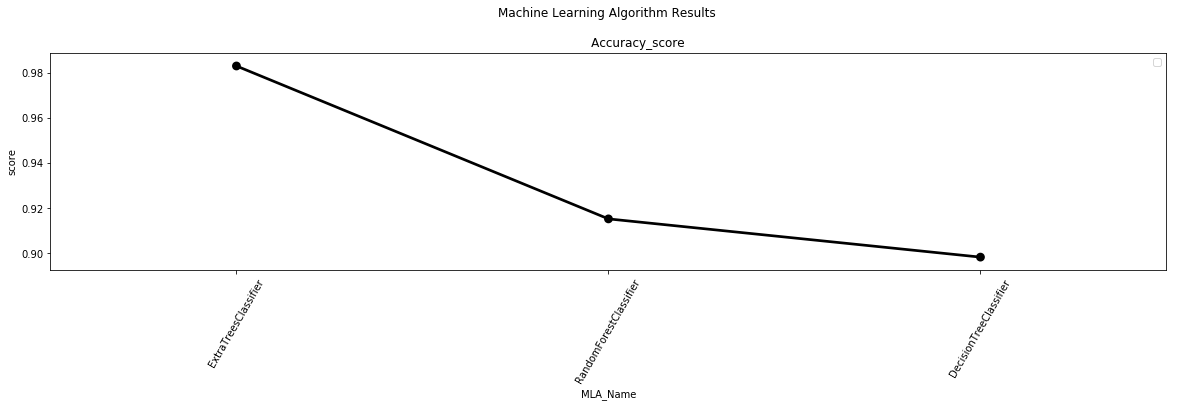

In [0]:


plt.figure(figsize=(20,4))
MLA_compare1.sort_values(by = ['accuracy_score'], ascending = False, inplace = True)

sns.pointplot(y='accuracy_score', x ='MLA_Name', data = MLA_compare1 , color = 'black',markers=["o"],label = ['accuracy_score'])
plt.title('Machine Learning Algorithm Results \n\n               Accuracy_score')
plt.xlabel('MLA_Name')

plt.ylabel('score')
plt.xticks(rotation=60)
plt.legend()
style = dict(size=10, color='gray')



In [0]:
####################################################################################################################################################

                                                # M O D E L - 2 #
  
####################################################################################################################################################

In [0]:
##  7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 
##  8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [0]:
## max_depth: This determines the maximum depth of the tree. In our case, we use a depth of two to make our decision tree. The default value is set to none. 
##            This will often result in over-fitted decision trees. The depth parameter is one of the ways in which we can regularize the tree, or limit the way 
##            it grows to prevent over-fitting.
## min_samples_split: The minimum number of samples a node must contain in order to consider splitting. The default value is two. You can use this parameter to 
##                     regularize your tree.
## min_samples_leaf: The minimum number of samples needed to be considered a leaf node. The default value is set to one. Use this parameter to limit the growth 
##              of the tree.
## max_features: The number of features to consider when looking for the best split. If this value is not set, the decision tree will consider all features 
##               available to make the best split. Depending on your application, it’s often a good idea to tune this parameter.

In [0]:
MLA_columns = ['MLA_Name']
MLA_compare2 = pd.DataFrame(columns = MLA_columns)

In [0]:
max_depths2 = np.linspace(1, 32, 32, endpoint=True)


count=0
for max_depth2 in max_depths2:
  MLA2 =  [                                
          ensemble.ExtraTreesClassifier(criterion='entropy',max_depth=int(max_depth2)),            ##,min_samples_leaf=None                   
                               
          ensemble.RandomForestClassifier(criterion='entropy',max_depth=int(max_depth2)), 

          #Trees                                                         
      
          tree.DecisionTreeClassifier(criterion='entropy',max_depth=int(max_depth2))                             
          
         ]

  row_index2 = count  
  for alg in MLA2:
      
      from datetime import datetime
      import time
      #print(int(max_depth2),row_index2,alg.__class__.__name__)
      from datetime import datetime
      import time
      #print(int(max_depth),alg.__class__.__name__)
      #set name and parameters
      MLA_name = alg.__class__.__name__
      MLA_compare2.loc[row_index2, 'MLA_Name'] = MLA_name
      #MLA_compare.loc[row_index, 'MLA_Parameters'] = str(alg.get_params())   

      d = alg.fit(train1_x, train1_y)
      #MLA_predict2[MLA_name] = alg.predict(test1_x)
      #MLA_compare2.loc[row_index2, 'MLA_Intercept'] =  alg.intercept_
      MLA_compare2.loc[row_index2, 'Actual_Y_Shape'] =test1_y.shape
      MLA_compare2.loc[row_index2, 'max_depths'] =max_depth2
      MLA_compare2.loc[row_index2, 'confusion_matrix'] = str(metrics.confusion_matrix(test1_y,alg.predict(test1_x)))
      MLA_compare2.loc[row_index2, 'accuracy_score'] = metrics.accuracy_score(test1_y,alg.predict(test1_x))
      confusion_matrix = metrics.confusion_matrix(test1_y,alg.predict(test1_x))
      MLA_compare2.loc[row_index2, 'True_Positive_Rate\n[Sensitivity/Recall]'] = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
      MLA_compare2.loc[row_index2, 'Precision'] = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
      MLA_compare2.loc[row_index2, 'True_Negatve_Rate\n[Specificity]'] = confusion_matrix[1][1]/(confusion_matrix[1][0]+confusion_matrix[1][1])    
      MLA_compare2.loc[row_index2, 'mean_absolute_error'] = metrics.mean_absolute_error(test1_y, alg.predict(test1_x))
      MLA_compare2.loc[row_index2, 'mean_squared_error'] = metrics.mean_squared_error(test1_y, alg.predict(test1_x))
      MLA_compare2.loc[row_index2, 'root_mean_squared_error'] = np.sqrt(metrics.mean_squared_error(test1_y, alg.predict(test1_x)))
      #MLA_compare.loc[row_index2, 'explained_variance_score'] = explained_variance_score(test1_y, alg.predict(test1_x))
      MLA_compare2.loc[row_index2, 'Timestamp'] = str(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
      row_index2+=1
      
  count=row_index2

In [0]:

fmt = '%Y-%m-%d %H:%M:%S'
max_tstmp = datetime.strptime(MLA_compare2['Timestamp'].max(), fmt)
min_tstmp = datetime.strptime(MLA_compare2['Timestamp'].min(), fmt)


td = max_tstmp - min_tstmp
td_mins = int(round(td.total_seconds() / 60))

print('The model performance is approx. %s minutes' % td_mins)

The model performance is approx. 0 minutes


In [0]:
MLA_compare2.sort_values(by = ['accuracy_score','Precision'], ascending = False, inplace = True)
MLA_compare2.nlargest(5,'accuracy_score')

,MLA_Name,Actual_Y_Shape,max_depths,confusion_matrix,accuracy_score,True_Positive_Rate [Sensitivity/Recall],Precision,True_Negatve_Rate [Specificity],mean_absolute_error,mean_squared_error,root_mean_squared_error,Timestamp
37,RandomForestClassifier,59.0,13.0,[[13 0]\n [ 1 45]],0.983051,0.978261,1.0,0.978261,0.016949,0.016949,0.130189,2019-09-22 06:09:54
48,ExtraTreesClassifier,59.0,17.0,[[13 0]\n [ 1 45]],0.983051,0.978261,1.0,0.978261,0.016949,0.016949,0.130189,2019-09-22 06:09:54
54,ExtraTreesClassifier,59.0,19.0,[[13 0]\n [ 1 45]],0.983051,0.978261,1.0,0.978261,0.016949,0.016949,0.130189,2019-09-22 06:09:55
57,ExtraTreesClassifier,59.0,20.0,[[13 0]\n [ 1 45]],0.983051,0.978261,1.0,0.978261,0.016949,0.016949,0.130189,2019-09-22 06:09:55
82,RandomForestClassifier,59.0,28.0,[[13 0]\n [ 1 45]],0.983051,0.978261,1.0,0.978261,0.016949,0.016949,0.130189,2019-09-22 06:09:55


In [0]:
MLA_DEPTH_MAX= MLA_compare2.nlargest(1,'accuracy_score')
MLA_DEPTH_MAX_VALUE = np.array(MLA_DEPTH_MAX.loc[MLA_DEPTH_MAX.index,'max_depths'])
MLA_DEPTH_MAX_VALUE[0]


13.0

In [0]:
#######################################################################################################################################

#                                P E R F O R M A N C E      V I S U A L I Z A T I O N           

#######################################################################################################################################

Text(0, 0.5, 'Algorithm')

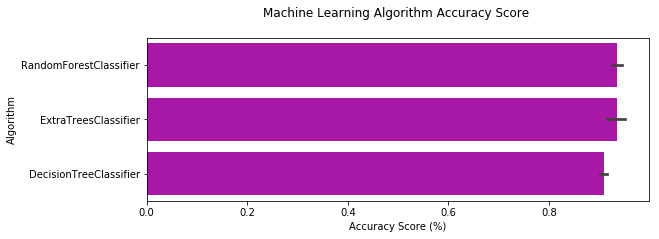

In [0]:
plt.figure(figsize=(9,3))
MLA_compare2.sort_values(by = ['accuracy_score','Precision'], ascending = False, inplace = True)
sns.barplot(x='accuracy_score', y ='MLA_Name', data = MLA_compare2 , color = 'm')
#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

No handles with labels found to put in legend.


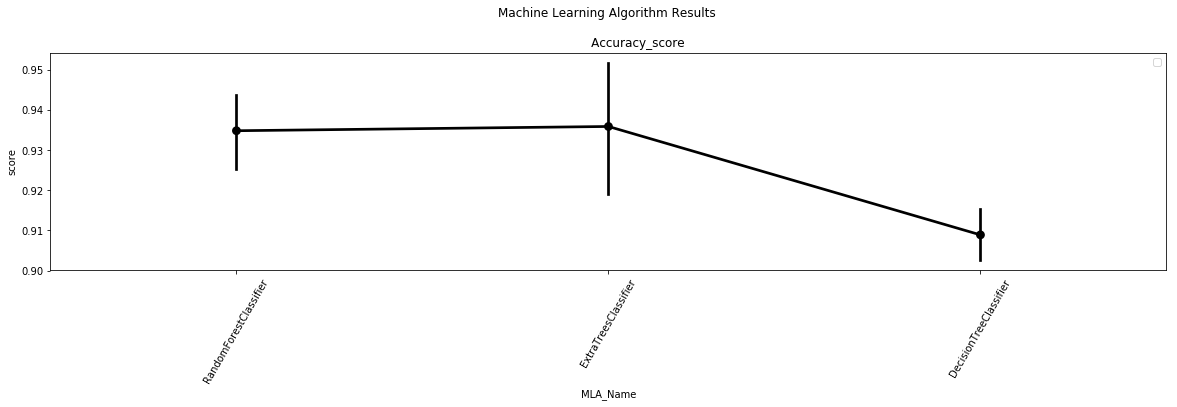

In [0]:


plt.figure(figsize=(20,4))
MLA_compare2.sort_values(by = ['accuracy_score'], ascending = False, inplace = True)

sns.pointplot(y='accuracy_score', x ='MLA_Name', data = MLA_compare2 , color = 'black',markers=["o"],label = ['accuracy_score'])
plt.title('Machine Learning Algorithm Results \n\n               Accuracy_score')
plt.xlabel('MLA_Name')
plt.ylabel('score')
plt.xticks(rotation=60)
plt.legend()
style = dict(size=10, color='gray')



In [0]:
####################################################################################################################################################

                                                                         # M O D E L - 3 #
  
####################################################################################################################################################

In [0]:
## With model 2 we find that good accuracy comes when max_depth = 9.0 for RandomForestClassifier  ## value may vary in iteration
## With model 2 we find that good accuracy comes when max_depth = 12.0 for ExtraTreesClassifier   ## value may vary in iteration

## So, now regularizing min_sample_leaf with max_depth = 9.0

In [0]:
MLA_columns = ['MLA_Name']
MLA_compare3 = pd.DataFrame(columns = MLA_columns)

In [0]:
min_sample_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
#max_depths3 = 21

count=0
for min_sample_leaf3 in min_sample_leaf:
  MLA3 =  [                                
          ensemble.ExtraTreesClassifier(criterion='entropy',min_samples_leaf=(min_sample_leaf3)),            ##,min_samples_leaf=None                   
                               
          ensemble.RandomForestClassifier(criterion='entropy',min_samples_leaf=(min_sample_leaf3)), 

          #Trees                                                         
      
          tree.DecisionTreeClassifier(criterion='entropy',min_samples_leaf=(min_sample_leaf3))                             
          
         ]

  row_index3 = count  
  for alg in MLA3:
      
      from datetime import datetime
      import time
      #print(int(max_depth2),row_index2,alg.__class__.__name__)
      from datetime import datetime
      import time
      #print(int(max_depth),alg.__class__.__name__)
      #set name and parameters
      MLA_name = alg.__class__.__name__
      MLA_compare3.loc[row_index3, 'MLA_Name'] = MLA_name
      #MLA_compare.loc[row_index, 'MLA_Parameters'] = str(alg.get_params())   

      d = alg.fit(train1_x, train1_y)
      #MLA_predict[MLA_name] = alg.predict(test1_x)
      #MLA_compare3.loc[row_index3, 'MLA_Intercept'] =  alg.intercept_
      MLA_compare3.loc[row_index3, 'Actual_Y_Shape'] =test1_y.shape
      MLA_compare3.loc[row_index3, 'min_sample_leaf'] =min_sample_leaf3
      MLA_compare3.loc[row_index3, 'confusion_matrix'] = str(metrics.confusion_matrix(test1_y,alg.predict(test1_x)))
      MLA_compare3.loc[row_index3, 'accuracy_score'] = metrics.accuracy_score(test1_y,alg.predict(test1_x))
      confusion_matrix = metrics.confusion_matrix(test1_y,alg.predict(test1_x))
      MLA_compare3.loc[row_index3, 'True_Positive_Rate\n[Sensitivity/Recall]'] = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
      MLA_compare3.loc[row_index3, 'Precision'] = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
      MLA_compare3.loc[row_index3, 'True_Negatve_Rate\n[Specificity]'] = confusion_matrix[1][1]/(confusion_matrix[1][0]+confusion_matrix[1][1])    
      MLA_compare3.loc[row_index3, 'mean_absolute_error'] = metrics.mean_absolute_error(test1_y, alg.predict(test1_x))
      MLA_compare3.loc[row_index3, 'mean_squared_error'] = metrics.mean_squared_error(test1_y, alg.predict(test1_x))
      MLA_compare3.loc[row_index3, 'root_mean_squared_error'] = np.sqrt(metrics.mean_squared_error(test1_y, alg.predict(test1_x)))
      #MLA_compare3.loc[row_index3, 'explained_variance_score'] = explained_variance_score(test1_y, alg.predict(test1_x))
      MLA_compare3.loc[row_index3, 'Timestamp'] = str(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
      row_index3+=1
      
  count=row_index3

In [0]:

fmt = '%Y-%m-%d %H:%M:%S'
max_tstmp = datetime.strptime(MLA_compare3['Timestamp'].max(), fmt)
min_tstmp = datetime.strptime(MLA_compare3['Timestamp'].min(), fmt)


td = max_tstmp - min_tstmp
td_mins = int(round(td.total_seconds() / 60))

print('The model performance is approx. %s minutes' % td_mins)

The model performance is approx. 0 minutes


In [0]:
MLA_compare3.sort_values(by = ['accuracy_score','Precision'], ascending = False, inplace = True)
MLA_compare3.nlargest(5,'accuracy_score')

,MLA_Name,Actual_Y_Shape,min_sample_leaf,confusion_matrix,accuracy_score,True_Positive_Rate [Sensitivity/Recall],Precision,True_Negatve_Rate [Specificity],mean_absolute_error,mean_squared_error,root_mean_squared_error,Timestamp
1,RandomForestClassifier,59.0,0.1,[[ 9 4]\n [ 0 46]],0.932203,1.000000,0.920000,1.000000,0.067797,0.067797,0.260378,2019-09-22 06:09:56
5,DecisionTreeClassifier,59.0,0.2,[[ 9 4]\n [ 2 44]],0.898305,0.956522,0.916667,0.956522,0.101695,0.101695,0.318896,2019-09-22 06:09:56
8,DecisionTreeClassifier,59.0,0.3,[[ 9 4]\n [ 4 42]],0.864407,0.913043,0.913043,0.913043,0.135593,0.135593,0.368230,2019-09-22 06:09:56
2,DecisionTreeClassifier,59.0,0.1,[[ 5 8]\n [ 0 46]],0.864407,1.000000,0.851852,1.000000,0.135593,0.135593,0.368230,2019-09-22 06:09:56
11,DecisionTreeClassifier,59.0,0.4,[[10 3]\n [ 9 37]],0.796610,0.804348,0.925000,0.804348,0.203390,0.203390,0.450988,2019-09-22 06:09:56


In [0]:
MLA_SAMPLE_LEAF_MIN = MLA_compare3.nlargest(1,'accuracy_score')
MLA_SAMPLE_LEAF_MIN_VALUE = np.array(MLA_SAMPLE_LEAF_MIN.loc[MLA_SAMPLE_LEAF_MIN.index,'min_sample_leaf'])
MLA_SAMPLE_LEAF_MIN_VALUE[0]

0.1

In [0]:
#######################################################################################################################################

#                                P E R F O R M A N C E      V I S U A L I Z A T I O N           

#######################################################################################################################################

Text(0, 0.5, 'Algorithm')

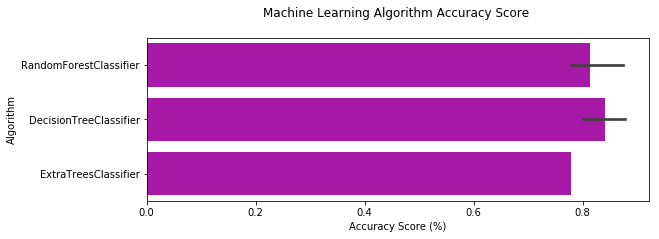

In [0]:
plt.figure(figsize=(9,3))
MLA_compare3.sort_values(by = ['accuracy_score','Precision'], ascending = False, inplace = True)
sns.barplot(x='accuracy_score', y ='MLA_Name', data = MLA_compare3, color = 'm')
#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

No handles with labels found to put in legend.


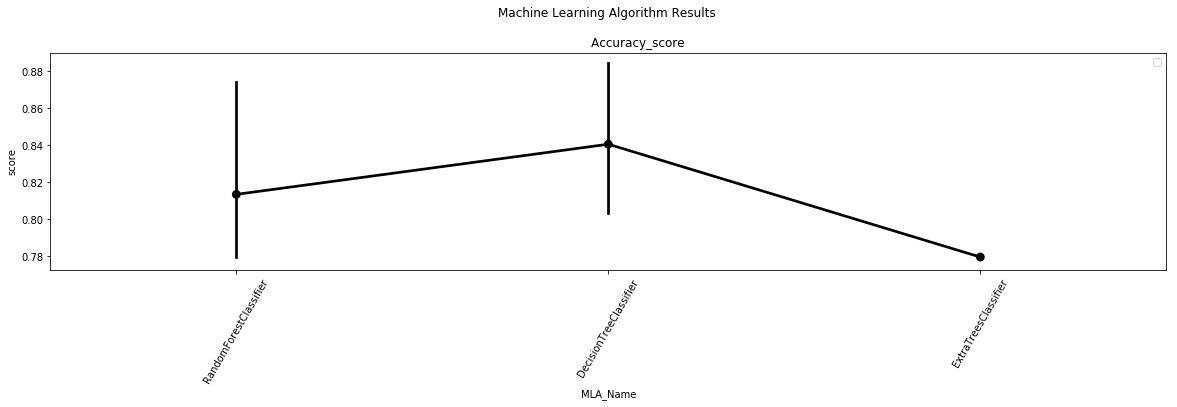

In [0]:


plt.figure(figsize=(20,4))
MLA_compare3.sort_values(by = ['accuracy_score'], ascending = False, inplace = True)

sns.pointplot(y='accuracy_score', x ='MLA_Name', data = MLA_compare3 , color = 'black',markers=["o"],label = ['accuracy_score'])
plt.title('Machine Learning Algorithm Results \n\n               Accuracy_score')
plt.xlabel('MLA_Name')
plt.ylabel('score')
plt.xticks(rotation=60)
plt.legend()
style = dict(size=10, color='gray')



In [0]:
####################################################################################################################################################

                                                # M O D E L - 4 # Applying model 2 and model 3 parameter regularization to random forest
  
####################################################################################################################################################

In [0]:
  #Machine Learning Algorithm (MLA) Selection and Initialization ,  
    
MLA4  =  [
    ensemble.RandomForestClassifier(criterion='entropy',min_samples_leaf= MLA_SAMPLE_LEAF_MIN_VALUE[0],max_depth= MLA_DEPTH_MAX_VALUE[0])
]
                             
                                        


In [0]:
MLA_columns = ['MLA_Name']
MLA_compare4 = pd.DataFrame(columns = MLA_columns)

In [0]:
row_index4 = 0
for alg in MLA4:
    
    from datetime import datetime
    import time

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare4.loc[row_index1, 'MLA_Name'] = MLA_name
    #MLA_compare4.loc[row_index1, 'MLA_Parameters'] = str(alg.get_params())   
 
    d = alg.fit(train1_x, train1_y)
    #MLA_predict[MLA_name] = alg.predict(test1_x)
    #MLA_compare4.loc[row_index1, 'MLA_Intercept'] =  alg.intercept_
    MLA_compare4.loc[row_index1, 'Actual_Y_Shape'] =test1_y.shape
    MLA_compare4.loc[row_index1, 'confusion_matrix'] = str(metrics.confusion_matrix(test1_y,alg.predict(test1_x)))
    MLA_compare4.loc[row_index1, 'accuracy_score'] = metrics.accuracy_score(test1_y,alg.predict(test1_x))
    confusion_matrix = metrics.confusion_matrix(test1_y,alg.predict(test1_x))
    MLA_compare4.loc[row_index1, 'True_Positive_Rate\n[Sensitivity/Recall]'] = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
    MLA_compare4.loc[row_index1, 'Precision'] = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
    MLA_compare4.loc[row_index1, 'True_Negatve_Rate\n[Specificity]'] = confusion_matrix[1][1]/(confusion_matrix[1][0]+confusion_matrix[1][1])    
    MLA_compare4.loc[row_index1, 'mean_absolute_error'] = metrics.mean_absolute_error(test1_y, alg.predict(test1_x))
    MLA_compare4.loc[row_index1, 'mean_squared_error'] = metrics.mean_squared_error(test1_y, alg.predict(test1_x))
    MLA_compare4.loc[row_index1, 'root_mean_squared_error'] = np.sqrt(metrics.mean_squared_error(test1_y, alg.predict(test1_x)))
    #MLA_compare4.loc[row_index1, 'explained_variance_score'] = explained_variance_score(test1_y, alg.predict(test1_x))
    MLA_compare4.loc[row_index1, 'Timestamp'] = str(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    

   
    row_index1+=1

In [0]:

fmt = '%Y-%m-%d %H:%M:%S'
max_tstmp = datetime.strptime(MLA_compare4['Timestamp'].max(), fmt)
min_tstmp = datetime.strptime(MLA_compare4['Timestamp'].min(), fmt)


td = max_tstmp - min_tstmp
td_mins = int(round(td.total_seconds() / 60))

print('The model performance is approx. %s minutes' % td_mins)

The model performance is approx. 0 minutes


In [0]:
MLA_compare4.sort_values(by = ['accuracy_score','Precision'], ascending = False, inplace = True)
##MLA_compare4.nlargest(5,'accuracy_score')

In [0]:
acc_score = MLA_compare4.nlargest(1,'accuracy_score')
acc_score_value = np.array(acc_score.loc[acc_score.index,'accuracy_score'])
acc_score_value[0]

0.9152542372881356

In [0]:
print('With min_samples_leaf= {},max_depth= {} , we got accuracy of {} with RandomforestClassifier'.format(MLA_SAMPLE_LEAF_MIN_VALUE[0],MLA_DEPTH_MAX_VALUE[0],acc_score_value[0]))

With min_samples_leaf= 0.1,max_depth= 13.0 , we got accuracy of 0.9152542372881356 with RandomforestClassifier


In [0]:
###########################################################  F I N I S H #############################################################################